<a href="https://colab.research.google.com/github/patricio-tech/proyectos/blob/master/phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de tipos de falla general
Redes neuronales convolucionales

Edwin Solís

2020




###RED NEURONAL CONVOLUCIONAL CLASIFICADOR

In [ ]:
!wget --no-check-certificate \
   https://www.dropbox.com/s/tlvnjiqp6q8itte/phase1.zip?dl=0\
   -O /tmp/phase1.zip




--2020-09-02 18:42:17--  https://www.dropbox.com/s/tlvnjiqp6q8itte/phase1.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tlvnjiqp6q8itte/phase1.zip [following]
--2020-09-02 18:42:17--  https://www.dropbox.com/s/raw/tlvnjiqp6q8itte/phase1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc61d190e301204e31cf9bdaebd9.dl.dropboxusercontent.com/cd/0/inline/A-ppJXTtatY2bwqNe4u8OapmShcYsLafit1R1inrD4LpANm3e7w5JtKyAx4uKPsOUYCFtHNAP7oF5y_5L3p79PnEmmADB76ZVZG526KIYbtGAT3EaAmvFxfEcb0xTmeREFI/file# [following]
--2020-09-02 18:42:17--  https://uc61d190e301204e31cf9bdaebd9.dl.dropboxusercontent.com/cd/0/inline/A-ppJXTtatY2bwqNe4u8OapmShcYsLafit1R1inrD4LpANm3e7w5JtKyAx4uKPsOUYCFtHNAP7oF5y_5L3p79PnEmmADB76ZVZG526KIYbtGAT3EaAm

In [ ]:
import os
import zipfile

local_zip = '/tmp/phase1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/phase1'

train_dir =      os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_1f_dir = os.path.join(train_dir, '1f')
train_2f_dir = os.path.join(train_dir, '2f')
train_2fn_dir = os.path.join(train_dir, '2fn')
train_3f_dir = os.path.join(train_dir, '3f')
train_3fn_dir = os.path.join(train_dir, '3fn')



# Directorio con las imagenes de test
test_1f_dir = os.path.join(test_dir, '1f')
test_2f_dir = os.path.join(test_dir, '2f')
test_2fn_dir = os.path.join(test_dir, '2fn')
test_3f_dir = os.path.join(test_dir, '3f')
test_3fn_dir = os.path.join(test_dir, '3fn')


In [ ]:
train_1f_fnames = os.listdir( train_1f_dir )
print(train_1f_fnames[:5])
train_2f_fnames = os.listdir( train_2f_dir )
print(train_2f_fnames[:5])
train_2fn_fnames = os.listdir( train_2fn_dir )
print(train_2fn_fnames[:5])
train_3f_fnames = os.listdir( train_3f_dir )
print(train_3f_fnames[:5])
train_3fn_fnames = os.listdir( train_3fn_dir )
print(train_3fn_fnames[:5])

test_1f_fnames = os.listdir( test_1f_dir )
print(test_1f_fnames[:5])
test_2f_fnames = os.listdir( test_2f_dir )
print(test_2f_fnames[:5])
test_2fn_fnames = os.listdir( test_2fn_dir )
print(test_2fn_fnames[:5])
test_3f_fnames = os.listdir( test_3f_dir )
print(test_3f_fnames[:5])
test_3fn_fnames = os.listdir( test_3fn_dir )
print(test_3fn_fnames[:5])




['fault1f7.jpg', 'fault1f13.jpg', 'fault1f14.jpg', 'fault1f17.jpg', 'fault1f9.jpg']
['fault2f0.jpg', 'fault2f4.jpg', 'fault2f5.jpg', 'fault2f6.jpg', 'fault2f2.jpg']
['fault2fn1.jpg', 'fault2fn5.jpg', 'fault2fn3.jpg', 'fault2fn6.jpg', 'fault2fn4.jpg']
['fault3f0.jpg', 'fault3f3.jpg', 'fault3f1.jpg', 'fault3f2.jpg']
['fault3fn1.jpg', 'fault3fn0.jpg', 'fault3fn3.jpg', 'fault3fn2.jpg', 'fault3fn4.jpg']
['fault1f7.jpg', 'fault1f13.jpg', 'fault1f14.jpg', 'fault1f17.jpg', 'fault1f9.jpg']
['fault2f0.jpg', 'fault2f4.jpg', 'fault2f5.jpg', 'fault2f6.jpg', 'fault2f2.jpg']
['fault2fn7.jpg', 'fault2fn1.jpg', 'fault2fn5.jpg', 'fault2fn3.jpg', 'fault2fn6.jpg']
['fault3f0.jpg', 'fault3f3.jpg', 'fault3f1.jpg', 'fault3f2.jpg', 'fault3f4.jpg']
['fault3fn1.jpg', 'fault3fn0.jpg', 'fault3fn3.jpg', 'fault3fn2.jpg', 'fault3fn4.jpg']


In [ ]:
print('total training 1f images :', len(os.listdir(train_1f_dir ) ))
print('total training 2f images :', len(os.listdir(train_2f_dir ) ))
print('total training 2fn images :', len(os.listdir(train_2fn_dir ) ))
print('total training 3f images :', len(os.listdir(train_3f_dir ) ))
print('total training 3fn images :', len(os.listdir(train_3fn_dir ) ))

print('total test 1f images :', len(os.listdir(test_1f_dir ) ))
print('total test 2f images :', len(os.listdir(test_2f_dir ) ))
print('total test 2fn images :', len(os.listdir(test_2fn_dir ) ))
print('total test 3f images :', len(os.listdir(test_3f_dir ) ))
print('total test 3fn images :', len(os.listdir(test_3fn_dir ) ))



total training 1f images : 26
total training 2f images : 7
total training 2fn images : 7
total training 3f images : 4
total training 3fn images : 5
total test 1f images : 26
total test 2f images : 7
total test 2fn images : 8
total test 3f images : 5
total test 3fn images : 5


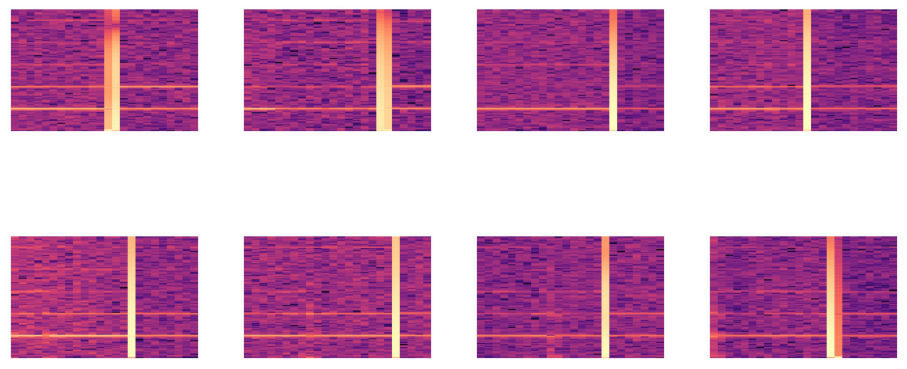

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_normal_pix = [os.path.join(train_1f_dir, fname)
                for fname in train_1f_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_normal_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='categorical_crossentropy',
   metrics = ['acc']
   )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode='categorical',
                  target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(test_dir,
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (150, 150))

Found 49 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Found 51 images belonging to 5 classes.


In [ ]:
batch_size = 20
steps_per_epoch = 2#train_generator.n // batch_size
validation_steps = 2#validation_generator.n // batch_size*2

print (steps_per_epoch)
print (validation_steps)

2
2


In [ ]:
history = model.fit_generator(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=10,
             validation_data=validation_generator,
             validation_steps= validation_steps)

Epoch 1/10
2/2 [==============================] - 2s 766ms/step - loss: 1.3036 - acc: 0.8450 - val_loss: 1.3995 - val_acc: 0.7900
Epoch 2/10
2/2 [==============================] - 1s 530ms/step - loss: 0.9825 - acc: 0.8759 - val_loss: 1.5957 - val_acc: 0.8050
Epoch 3/10
2/2 [==============================] - 1s 534ms/step - loss: 1.2636 - acc: 0.8414 - val_loss: 1.3438 - val_acc: 0.8350
Epoch 4/10
2/2 [==============================] - 1s 746ms/step - loss: 1.2781 - acc: 0.8350 - val_loss: 1.3415 - val_acc: 0.8300
Epoch 5/10
2/2 [==============================] - 2s 788ms/step - loss: 1.0526 - acc: 0.8759 - val_loss: 1.4675 - val_acc: 0.8050
Epoch 6/10
2/2 [==============================] - 2s 763ms/step - loss: 1.4575 - acc: 0.8000 - val_loss: 1.4306 - val_acc: 0.8000
Epoch 7/10
2/2 [==============================] - 1s 748ms/step - loss: 1.2002 - acc: 0.8450 - val_loss: 1.3834 - val_acc: 0.8050
Epoch 8/10
2/2 [==============================] - 2s 751ms/step - loss: 1.0925 - acc: 0.87

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

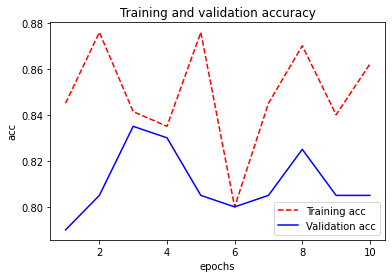

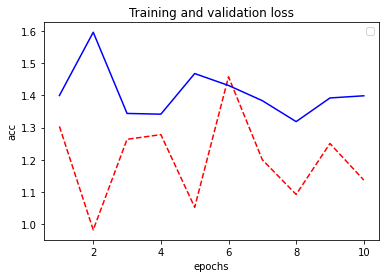

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc= model.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

Test Accuracy: 0.8039215803146362


In [ ]:
out = model.predict_classes(test_generator)
print(out)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
